In [1]:
import pandas as pd
import numpy as np
import plotly as py
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("df_with_relationship.csv")
df

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,salary,workclass,marital_status,occupation,relationship,race,country
0,39,77516,13,0,2174,0,40,0,1279,9711,3719,7714,25912,27608
1,50,83311,13,0,0,0,13,0,2498,14059,3991,12457,25912,27608
2,38,215646,9,0,0,0,40,0,22264,4212,1349,7714,25912,27608
3,53,234721,7,0,0,0,40,0,22264,14059,1349,12457,2816,27608
4,28,338409,13,1,0,0,40,0,22264,14059,4034,1406,2816,1220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27,257302,12,1,0,0,38,0,22264,14059,911,1406,25912,27608
30135,40,154374,9,0,0,0,40,1,22264,14059,1964,12457,25912,27608
30136,58,151910,9,1,0,0,40,0,22264,827,3719,3211,25912,27608
30137,22,201490,9,0,0,0,20,0,22264,9711,3719,4462,25912,27608


In [5]:
df['age'].sort_values(ascending=False)

14715    90
17449    90
9746     90
1780     90
5728     90
         ..
9358     17
9355     17
28602    17
11021    17
28743    17
Name: age, Length: 30139, dtype: int64

In [6]:
df.workclass.unique()

array([ 1279,  2498, 22264,   943,  2067,  1074,    14])

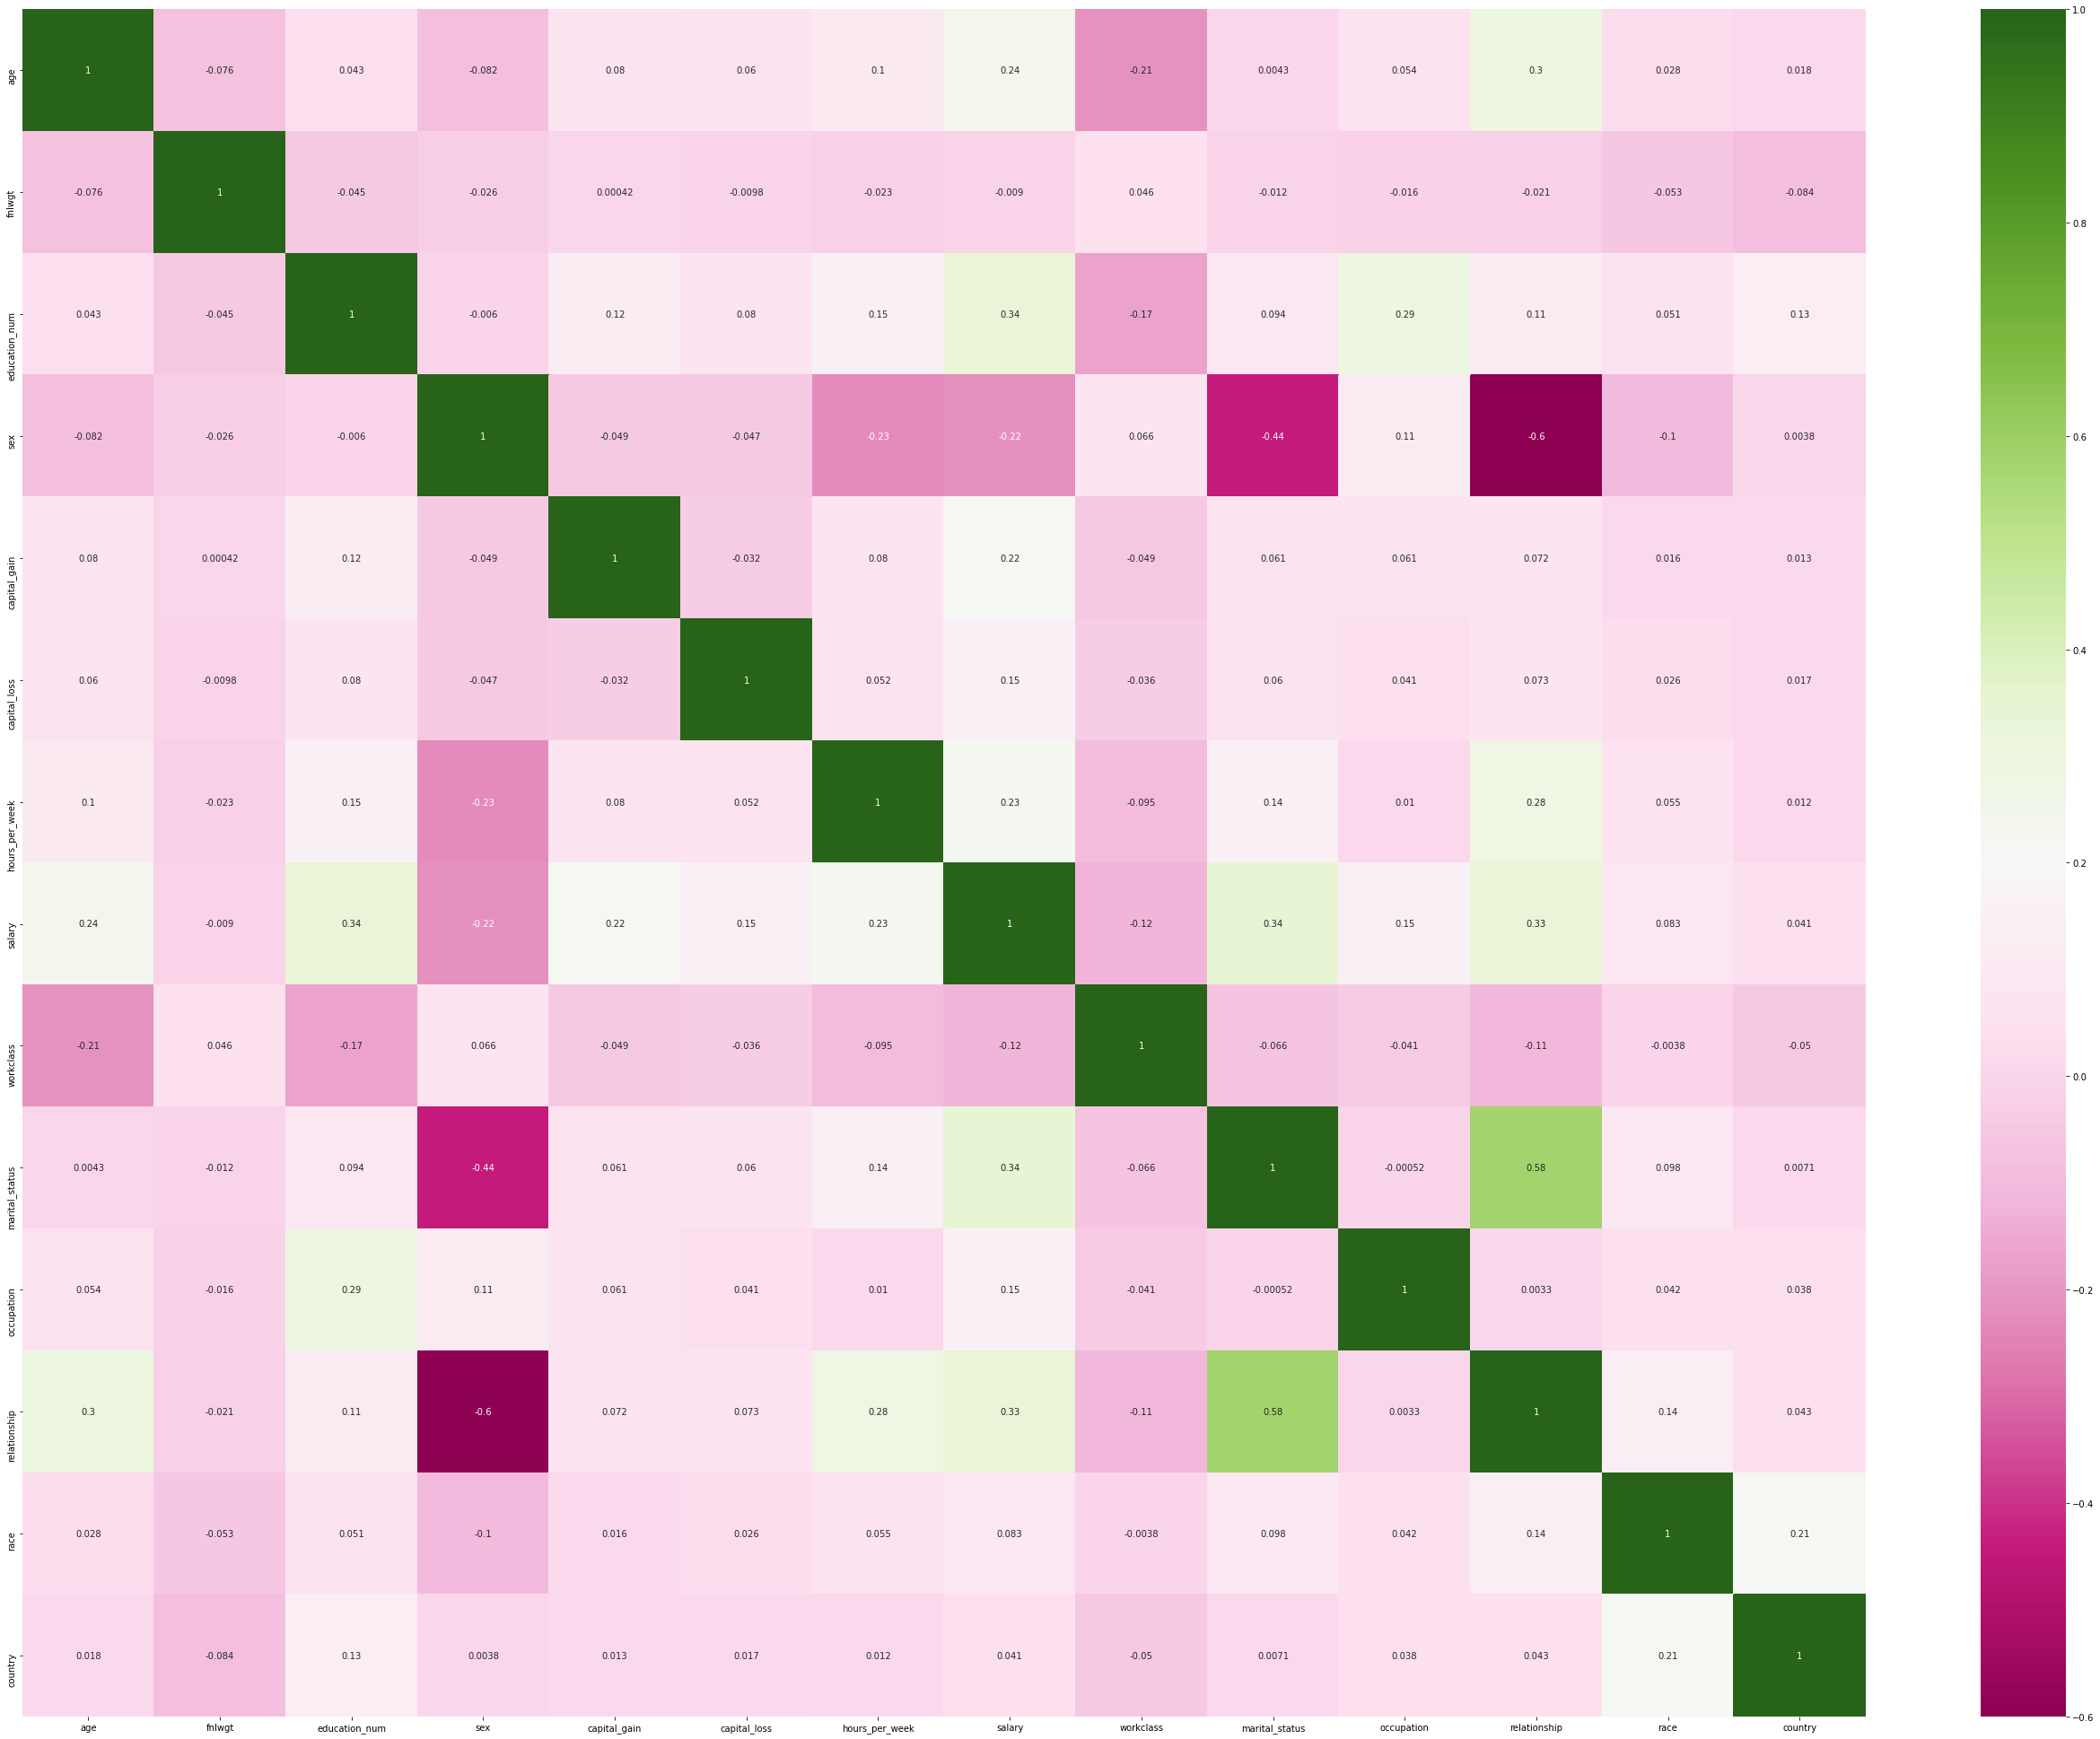

In [7]:
plt.figure(figsize=(46,35), facecolor='white')
sns.heatmap(df.corr(), cmap="PiYG", annot=True)
plt.show()

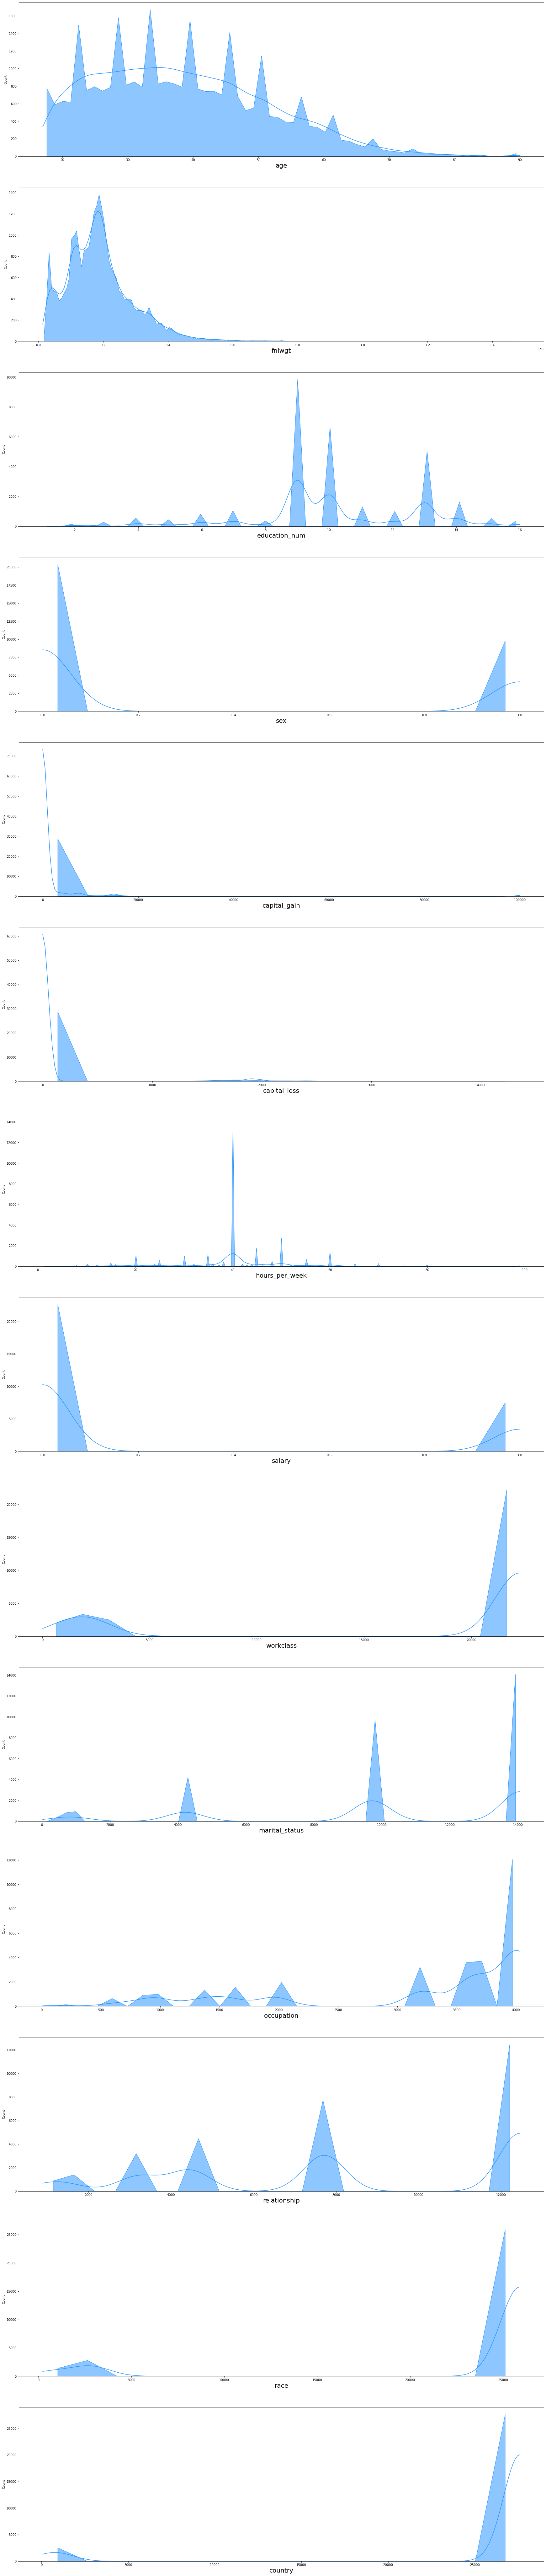

In [8]:
plt.figure(figsize=(30,150), facecolor='white')
j = 1

for column in df:
    if j<=14 :     # as there are 9 columns in the data
        ax = plt.subplot(14,1,j)
        sns.histplot(df[column], kde=True, element='poly', color='dodgerblue')
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    j+=1
plt.show()

<AxesSubplot:>

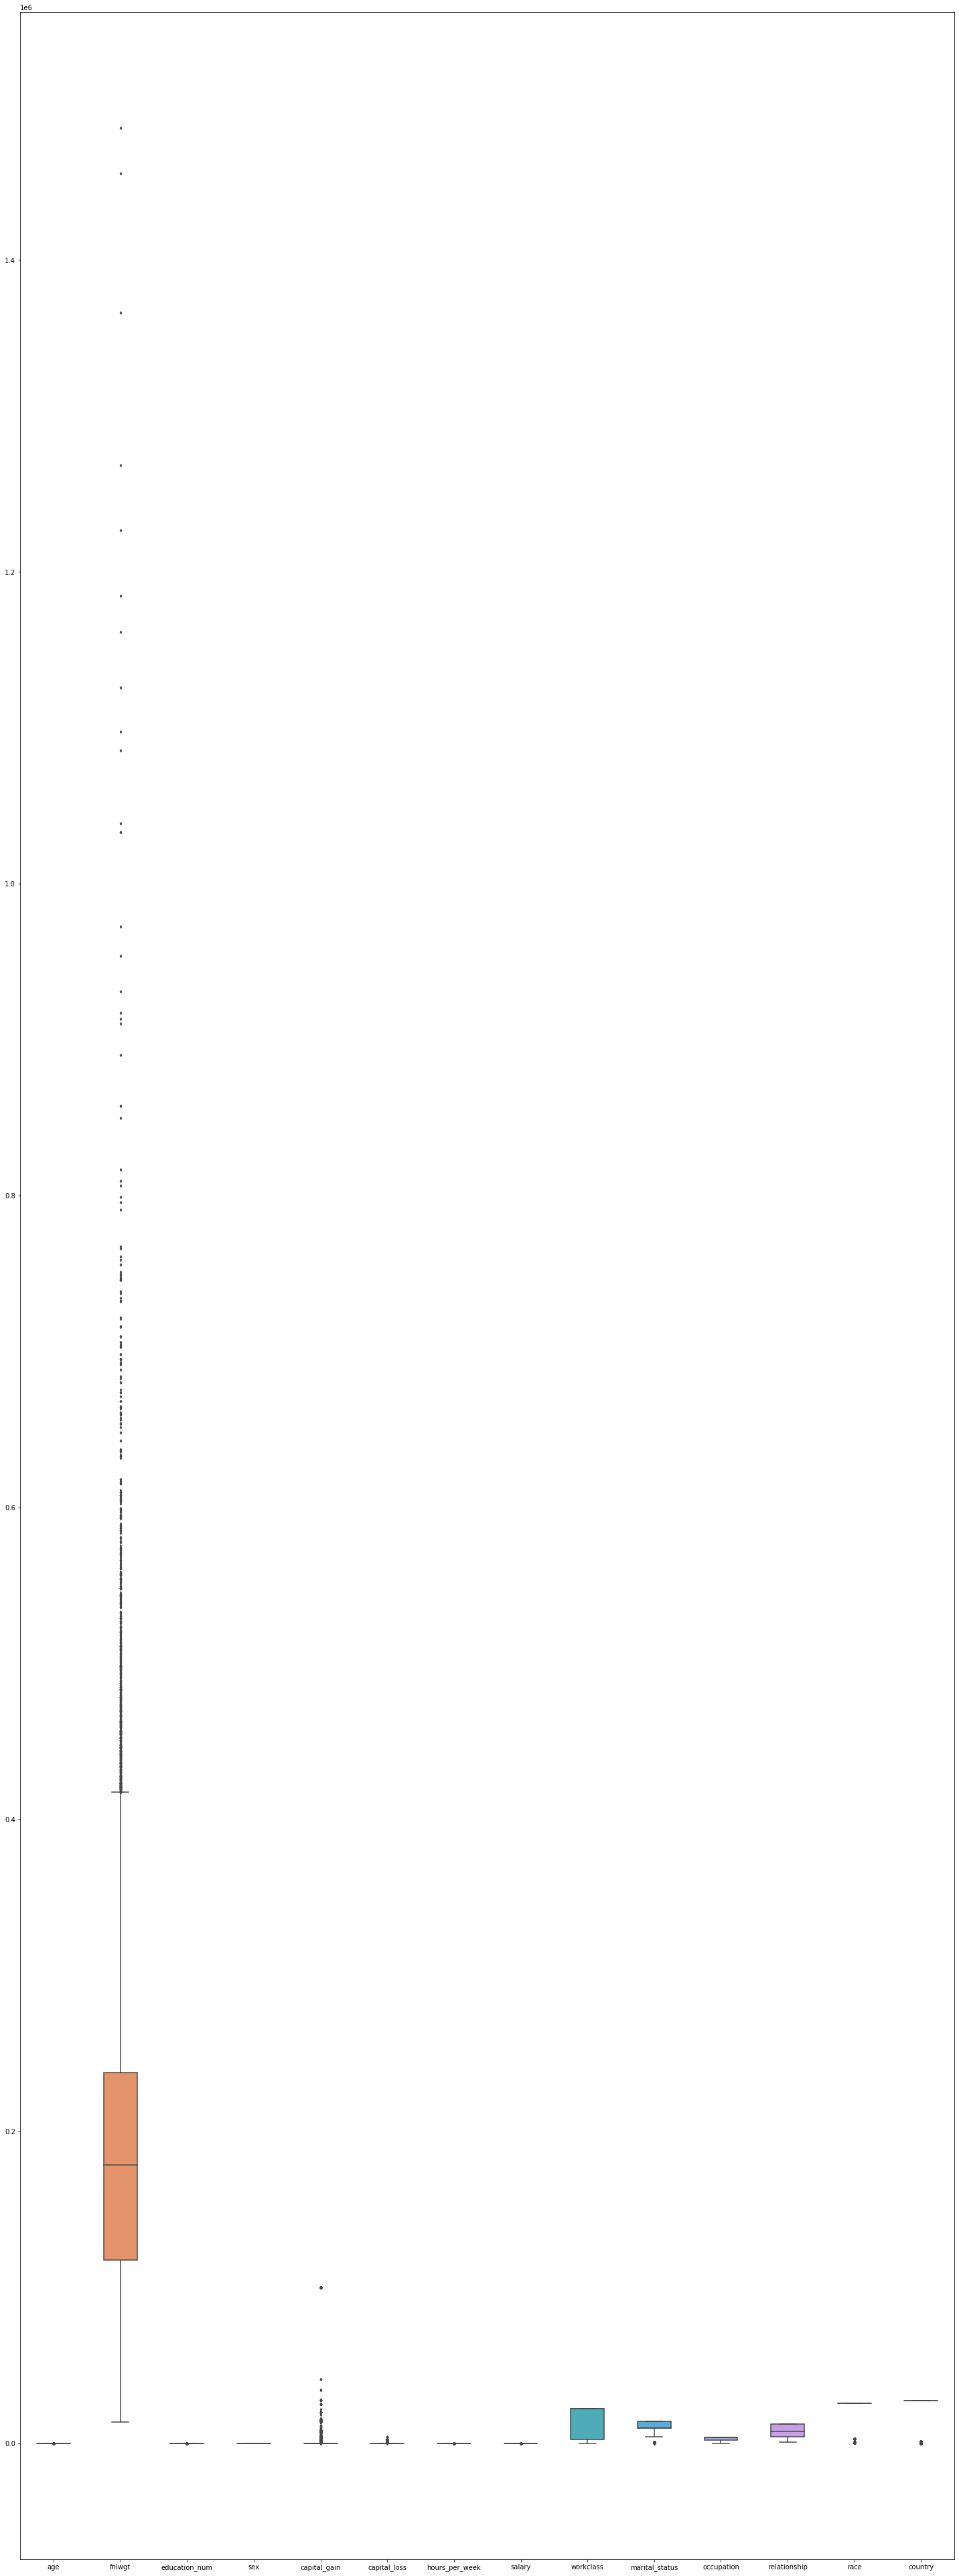

In [9]:
fig, ax = plt.subplots(figsize=(25,70))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)


In [10]:
new_df = pd.get_dummies(df, drop_first=True)

In [11]:
new_df

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,salary,workclass,marital_status,occupation,relationship,race,country
0,39,77516,13,0,2174,0,40,0,1279,9711,3719,7714,25912,27608
1,50,83311,13,0,0,0,13,0,2498,14059,3991,12457,25912,27608
2,38,215646,9,0,0,0,40,0,22264,4212,1349,7714,25912,27608
3,53,234721,7,0,0,0,40,0,22264,14059,1349,12457,2816,27608
4,28,338409,13,1,0,0,40,0,22264,14059,4034,1406,2816,1220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27,257302,12,1,0,0,38,0,22264,14059,911,1406,25912,27608
30135,40,154374,9,0,0,0,40,1,22264,14059,1964,12457,25912,27608
30136,58,151910,9,1,0,0,40,0,22264,827,3719,3211,25912,27608
30137,22,201490,9,0,0,0,20,0,22264,9711,3719,4462,25912,27608


<AxesSubplot:>

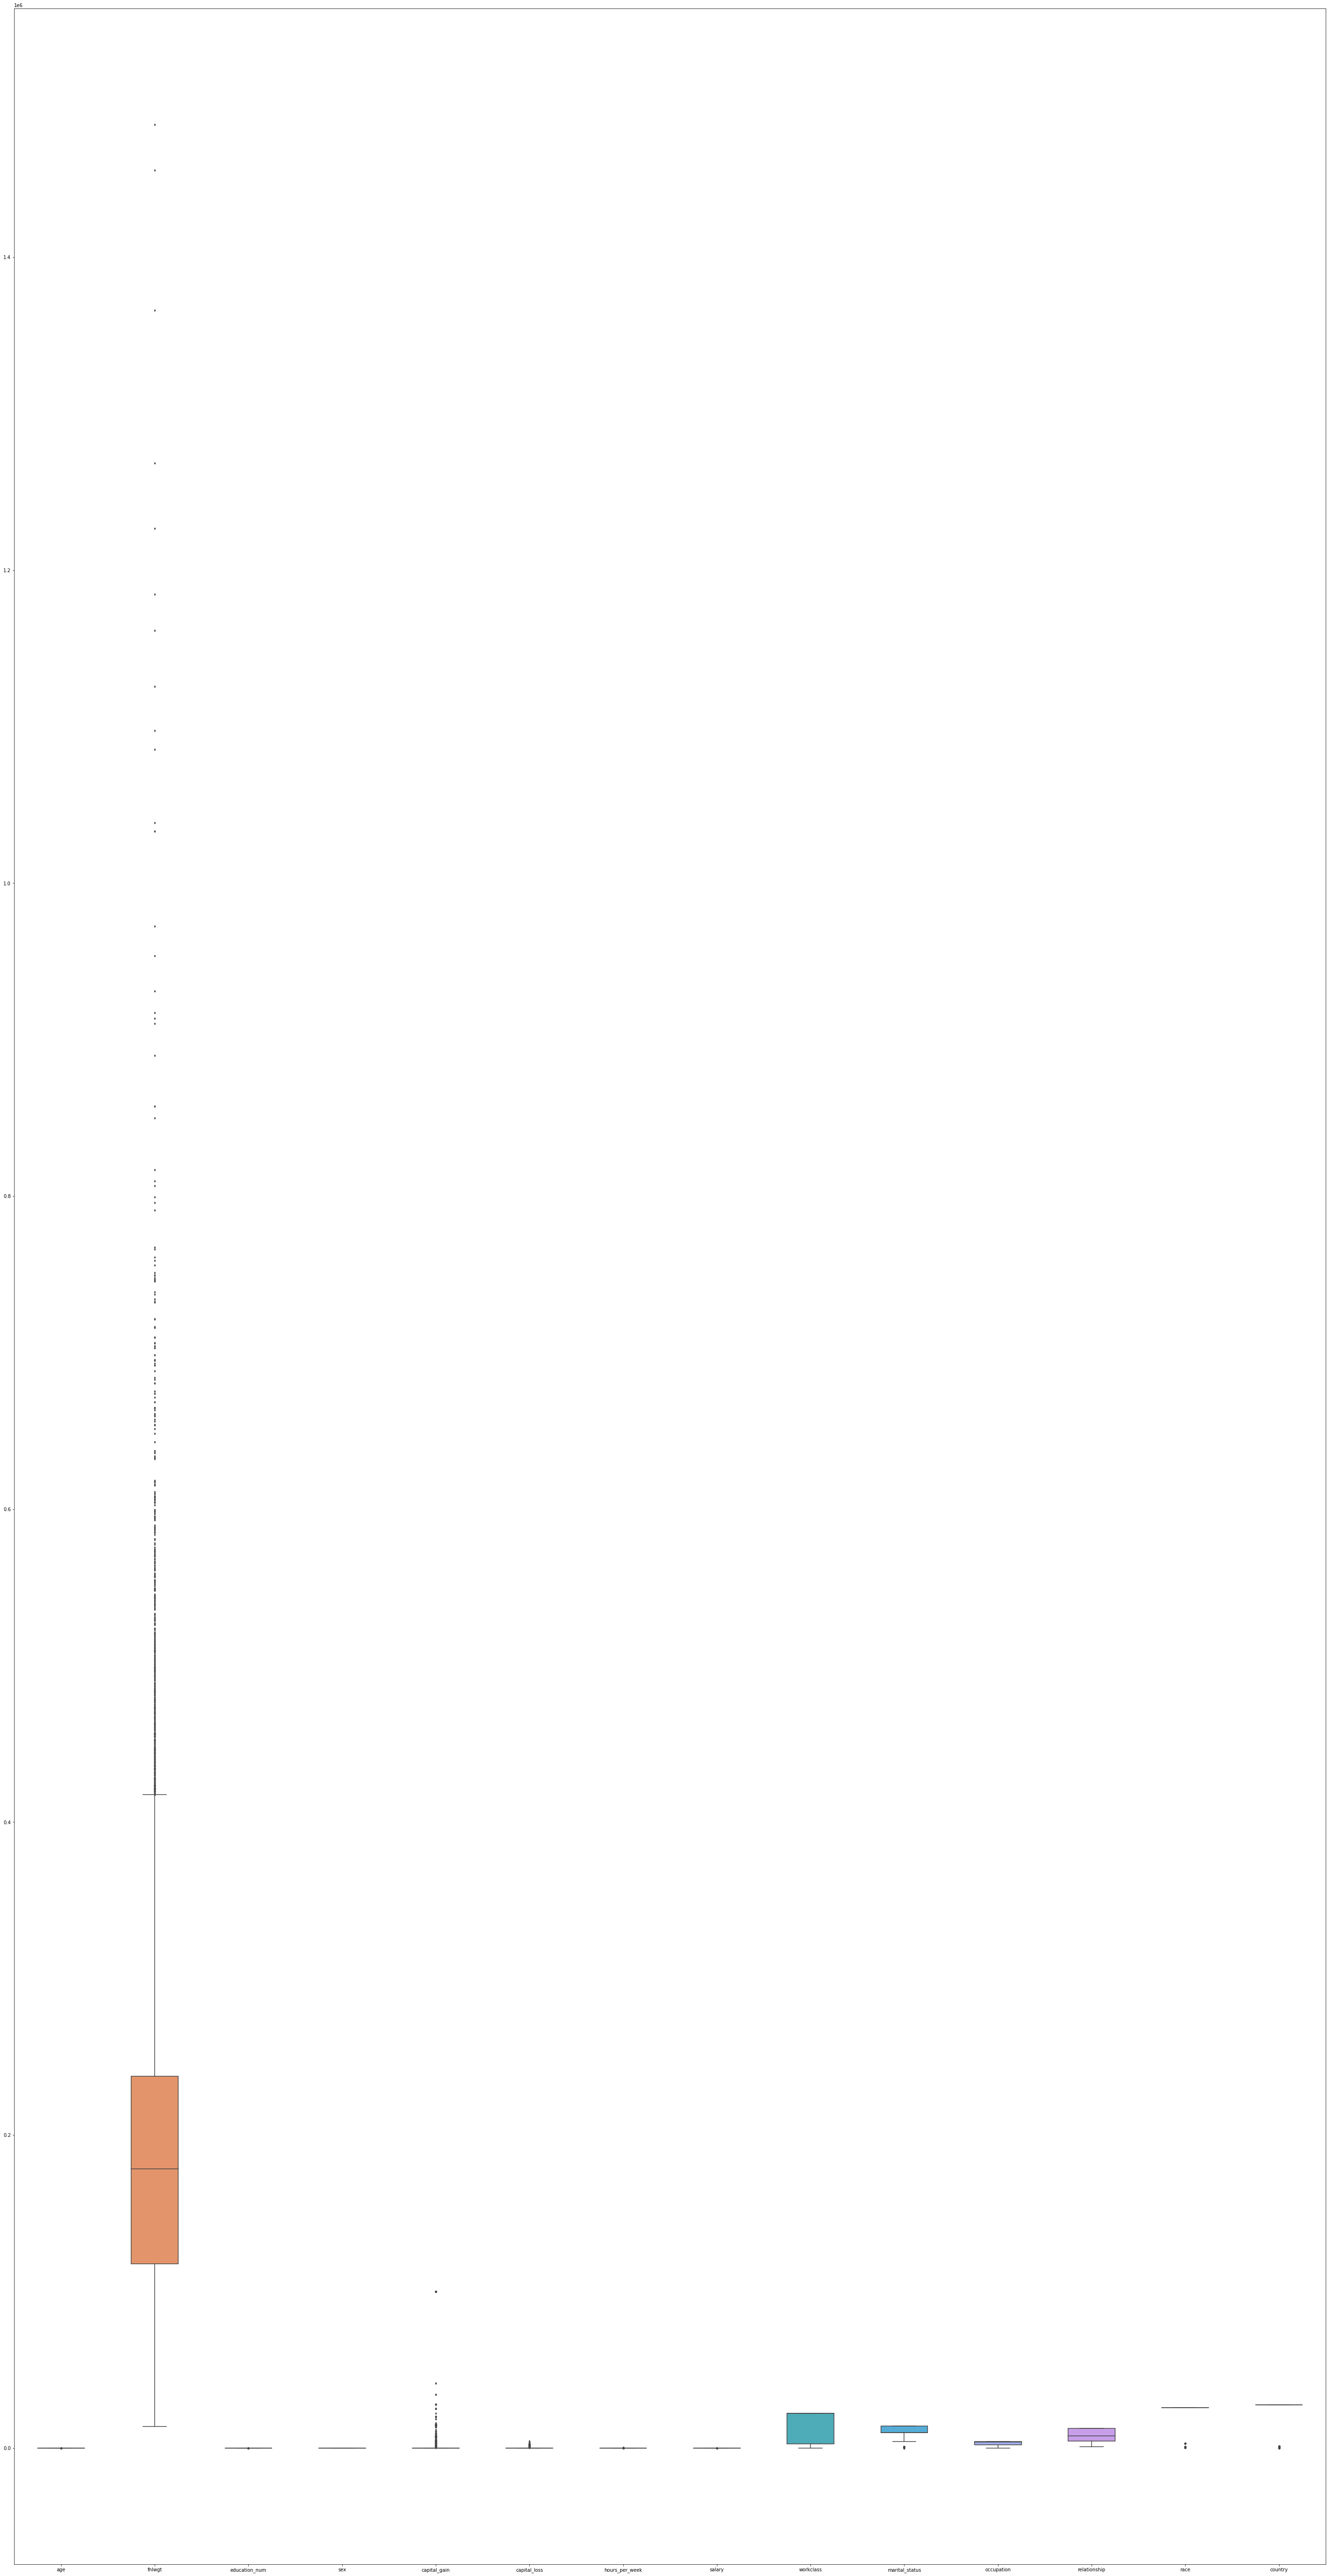

In [12]:
fig, ax = plt.subplots(figsize=(50,100))
sns.boxplot(data=new_df, width=0.5, ax=ax, fliersize=3)

In [13]:
pd.DataFrame(df.corr()['fnlwgt']).sort_values('fnlwgt')

,fnlwgt
country,-0.083831
age,-0.076279
race,-0.053492
education_num,-0.045199
sex,-0.025602
hours_per_week,-0.023033
relationship,-0.020946
occupation,-0.015573
marital_status,-0.011561
capital_loss,-0.009755


<AxesSubplot:>

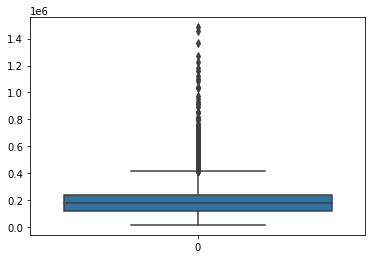

In [14]:
sns.boxplot(data=df['fnlwgt'])

In [15]:
first_quartile = df.fnlwgt.quantile(.25)
third_quartile = df.fnlwgt.quantile(.75)
iqr = third_quartile - first_quartile

In [16]:
new_boundary = third_quartile + 3*iqr

In [17]:
df.shape

(30139, 14)

In [18]:
df.drop(df[df['fnlwgt']>new_boundary].index, axis=0, inplace=True)

In [19]:
df.shape

(30004, 14)

<AxesSubplot:>

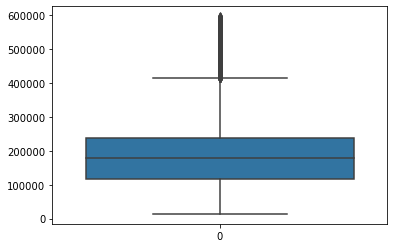

In [20]:
sns.boxplot(data=df['fnlwgt'])

In [21]:
pd.DataFrame(df.corr()['relationship']).sort_values('relationship')

,relationship
sex,-0.600465
workclass,-0.112148
fnlwgt,-0.018612
occupation,0.003194
country,0.042893
capital_gain,0.072431
capital_loss,0.072906
education_num,0.106886
race,0.140447
hours_per_week,0.275055


In [22]:
df

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,salary,workclass,marital_status,occupation,relationship,race,country
0,39,77516,13,0,2174,0,40,0,1279,9711,3719,7714,25912,27608
1,50,83311,13,0,0,0,13,0,2498,14059,3991,12457,25912,27608
2,38,215646,9,0,0,0,40,0,22264,4212,1349,7714,25912,27608
3,53,234721,7,0,0,0,40,0,22264,14059,1349,12457,2816,27608
4,28,338409,13,1,0,0,40,0,22264,14059,4034,1406,2816,1220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27,257302,12,1,0,0,38,0,22264,14059,911,1406,25912,27608
30135,40,154374,9,0,0,0,40,1,22264,14059,1964,12457,25912,27608
30136,58,151910,9,1,0,0,40,0,22264,827,3719,3211,25912,27608
30137,22,201490,9,0,0,0,20,0,22264,9711,3719,4462,25912,27608


In [23]:
df.to_csv("Outlier_removed.csv", index=False)